In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Download and import dataset

In [ ]:
# from google.colab import files
# files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"alisaleh79","key":"8261fc1922f07113f2fe4286eb92ca0f"}'}

In [ ]:
# ! pip install -q kaggle
# ! pip install --upgrade --force-reinstall --no-deps kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json


     |████████████████████████████████| 58 kB 2.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=6acb4c18ad51dc281765738192bfe2f5446c11ee437a9edb7c6302eba7c1f46f
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# ! kaggle competitions download -c talkingdata-adtracking-fraud-detection

100% 1.93G/1.94G [00:19<00:00, 39.0MB/s]
100% 1.94G/1.94G [00:19<00:00, 108MB/s] 


In [ ]:
# ! mv /content/talkingdata-adtracking-fraud-detection.zip /content/gdrive/MyDrive/ad_tracking_fraud_detection/
# ! unzip /content/gdrive/MyDrive/ad_tracking_fraud_detection/talkingdata-adtracking-fraud-detection.zip

Archive:  /content/gdrive/MyDrive/ad_tracking_fraud_detection/talkingdata-adtracking-fraud-detection.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test_supplement.csv     
  inflating: train.csv               
  inflating: train_sample.csv        


In [ ]:
# ! kaggle datasets download matleonard/feature-engineering-data

 98% 192M/196M [00:01<00:00, 112MB/s]
100% 196M/196M [00:01<00:00, 119MB/s]


In [ ]:
# ! mv /content/feature-engineering-data.zip /content/gdrive/MyDrive/AdTrackingLight
# ! unzip /content/gdrive/MyDrive/AdTrackingLight/feature-engineering-data.zip 

Archive:  /content/gdrive/MyDrive/AdTrackingLight/feature-engineering-data.zip
  inflating: baseline_data.pqt       
  inflating: catboost_encodings.pqt  
  inflating: count_encodings.pqt     
  inflating: downloads.pqt           
  inflating: interactions.pqt        
  inflating: past_6hr_events.pqt     
  inflating: svd_encodings.pqt       
  inflating: time_deltas.pqt         
  inflating: train_sample.csv        


In [ ]:
# ! unzip /content/gdrive/MyDrive/ad_tracking_fraud_detection/talkingdata-adtracking-fraud-detection.zip

In [ ]:
# ! mv /content/train_sample.csv /content/gdrive/MyDrive/ad_tracking_fraud_detection/

In [1]:
import pandas as pd

dataset = pd.read_csv('/content/gdrive/MyDrive/AdTrackingLight/train_sample.csv')
dataset

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0
...,...,...,...,...,...,...,...,...
2300556,32457,2,1,19,477,2017-11-09 15:59:59,NaN,0
2300557,20266,14,1,13,446,2017-11-09 15:59:59,NaN,0
2300558,49383,12,2,17,178,2017-11-09 16:00:00,NaN,0
2300559,34894,12,1,15,145,2017-11-09 16:00:00,NaN,0


In [183]:
dataset['is_attributed'].value_counts()

0    1843715
1     456846
Name: is_attributed, dtype: int64

# 1- Balance Test and Train Data

In [26]:
true_dataset = dataset[dataset['is_attributed'] == 1]
false_dataset = dataset[dataset['is_attributed'] == 0]

false_dataset = false_dataset.sample(len(true_dataset))

all_dataset = pd.concat([true_dataset, false_dataset])

all_dataset['is_attributed'].value_counts()

1    456846
0    456846
Name: is_attributed, dtype: int64

In [27]:
len(all_dataset)

913692

In [28]:
all_dataset = all_dataset.sample(frac=1).reset_index(drop=True)
all_dataset

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,108858,19,0,24,347,2017-11-07 13:55:23,2017-11-07 14:06:19,1
1,44725,34,1,19,243,2017-11-07 01:05:10,2017-11-07 02:17:46,1
2,228312,5,1,32,113,2017-11-08 13:41:27,2017-11-08 13:41:53,1
3,190548,2,1,22,477,2017-11-07 08:15:47,NaN,0
4,37025,2,1,19,219,2017-11-08 03:33:51,NaN,0
...,...,...,...,...,...,...,...,...
913687,78175,7,1,6,101,2017-11-09 08:58:20,NaN,0
913688,50136,1,1,16,125,2017-11-09 12:37:58,NaN,0
913689,68651,3,1,19,211,2017-11-09 05:15:03,NaN,0
913690,91181,35,1,13,274,2017-11-08 07:53:24,2017-11-08 08:09:31,1


In [29]:
balance_test = all_dataset.iloc[len(all_dataset) * 8 // 10:]
balance_train = all_dataset.iloc[:len(all_dataset) * 8 // 10]
balance_test

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
730953,100971,29,1,13,210,2017-11-08 13:02:20,2017-11-08 13:43:58,1
730954,247802,190,1,22,101,2017-11-09 06:36:00,2017-11-09 06:38:52,1
730955,312208,9,1,18,466,2017-11-09 05:21:58,2017-11-09 08:19:16,1
730956,20385,9,1,19,442,2017-11-08 15:50:05,NaN,0
730957,273549,19,0,0,213,2017-11-08 12:54:13,2017-11-08 12:55:27,1
...,...,...,...,...,...,...,...,...
913687,78175,7,1,6,101,2017-11-09 08:58:20,NaN,0
913688,50136,1,1,16,125,2017-11-09 12:37:58,NaN,0
913689,68651,3,1,19,211,2017-11-09 05:15:03,NaN,0
913690,91181,35,1,13,274,2017-11-08 07:53:24,2017-11-08 08:09:31,1


In [30]:
balance_train

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,108858,19,0,24,347,2017-11-07 13:55:23,2017-11-07 14:06:19,1
1,44725,34,1,19,243,2017-11-07 01:05:10,2017-11-07 02:17:46,1
2,228312,5,1,32,113,2017-11-08 13:41:27,2017-11-08 13:41:53,1
3,190548,2,1,22,477,2017-11-07 08:15:47,NaN,0
4,37025,2,1,19,219,2017-11-08 03:33:51,NaN,0
...,...,...,...,...,...,...,...,...
730948,120575,35,1,19,274,2017-11-08 05:09:10,2017-11-08 05:14:24,1
730949,176180,35,1,13,21,2017-11-07 01:27:28,2017-11-07 06:37:28,1
730950,37801,2,1,19,469,2017-11-07 09:46:49,NaN,0
730951,81834,18,1,14,107,2017-11-09 10:19:16,NaN,0


# 2- Unbalance Test and Balance Train

In [31]:
unbalance_test = dataset.iloc[len(dataset) * 9 // 10:]
unbalance_train = dataset.iloc[:len(dataset) * 9 // 10]

In [32]:
unbalance_test['is_attributed'].value_counts()

0    186305
1     43752
Name: is_attributed, dtype: int64

In [33]:
unbalance_train['is_attributed'].value_counts()

0    1657410
1     413094
Name: is_attributed, dtype: int64

In [34]:
true_dataset = unbalance_train[unbalance_train['is_attributed'] == 1]
false_dataset = unbalance_train[unbalance_train['is_attributed'] == 0]

false_dataset = false_dataset.sample(len(true_dataset))

balance_train_2 = pd.concat([true_dataset, false_dataset])

balance_train_2['is_attributed'].value_counts()

1    413094
0    413094
Name: is_attributed, dtype: int64

# Data preprocessing

In [40]:
import datetime

dataset['click_time'] = pd.to_datetime(dataset['click_time'])

for i in range(len(dataset['click_time'])):
  time = dataset['click_time'][i].time()
  if time < datetime.time(hour=6, minute=0, second=0):
    dataset['click_time'][i] = 'Midnight'
  elif time < datetime.time(hour=12, minute=0, second=0):
    dataset['click_time'][i] = 'Morning'
  elif time < datetime.time(hour=18, minute=0, second=0):
    dataset['click_time'][i] = 'Afternoon'
  elif time <= datetime.time(hour=23, minute=59, second=59):
    dataset['click_time'][i] = 'Night'


In [ ]:
dataset['click_time'].value_counts()

Midnight     32597
Morning      30464
Afternoon    27451
Night         9488
Name: click_time, dtype: int64

In [ ]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(dataset['click_time'])
# Drop column B as it is now encoded
dataset = dataset.drop('click_time',axis = 1)
# Join the encoded df
dataset = dataset.join(one_hot)
dataset

,ip,app,device,os,channel,attributed_time,is_attributed,Afternoon,Midnight,Morning,Night
0,87540,12,1,13,497,NaN,0,0,0,1,0
1,105560,25,1,17,259,NaN,0,1,0,0,0
2,101424,12,1,19,212,NaN,0,0,0,0,1
3,94584,13,1,13,477,NaN,0,0,1,0,0
4,68413,12,1,1,178,NaN,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,NaN,0,1,0,0,0
99996,85150,9,1,13,244,NaN,0,0,0,1,0
99997,18839,3,1,13,19,NaN,0,0,0,1,0
99998,114276,15,1,12,245,NaN,0,1,0,0,0


In [ ]:
dataset = dataset.drop(['attributed_time'], axis=1)

ip unique count: 34857


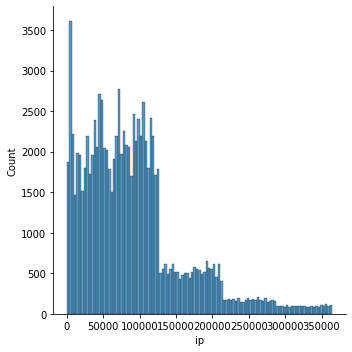

In [ ]:
import seaborn 

print('ip unique count:', len(dataset['ip'].unique()))
seaborn.displot(dataset['ip'])

app unique count: 161
3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64


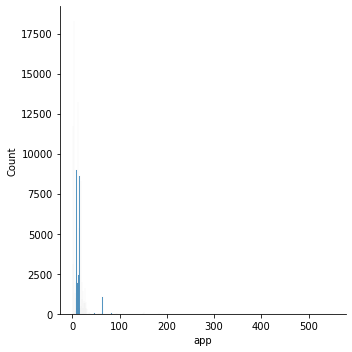

In [ ]:
print('app unique count:', len(dataset['app'].unique()))
print(dataset['app'].value_counts())
seaborn.displot(dataset['app'])

device unique count: 100
1       94338
2        4345
0         541
3032      371
3543      151
        ...  
420         1
37          1
549         1
2980        1
347         1
Name: device, Length: 100, dtype: int64


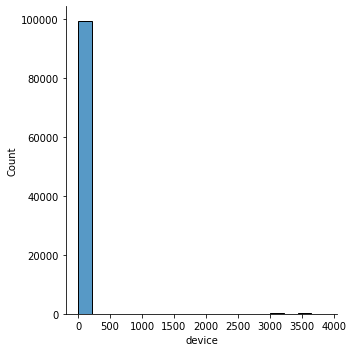

In [ ]:
print('device unique count:', len(dataset['device'].unique()))
print(dataset['device'].value_counts())
seaborn.displot(dataset['device'])

channel unique count: 161
280    8114
245    4802
107    4543
477    3960
134    3224
       ... 
261       1
498       1
465       1
474       1
451       1
Name: channel, Length: 161, dtype: int64


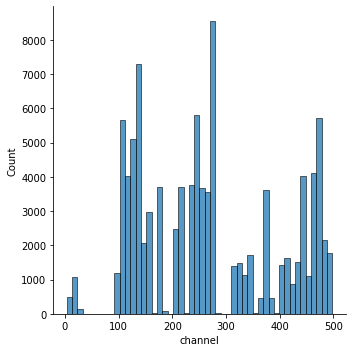

In [ ]:
print('channel unique count:', len(dataset['channel'].unique()))
print(dataset['channel'].value_counts())
seaborn.displot(dataset['channel'])

os unique count: 130
19     23870
13     21223
17      5232
18      4830
22      4039
       ...  
116        1
142        1
137        1
185        1
127        1
Name: os, Length: 130, dtype: int64


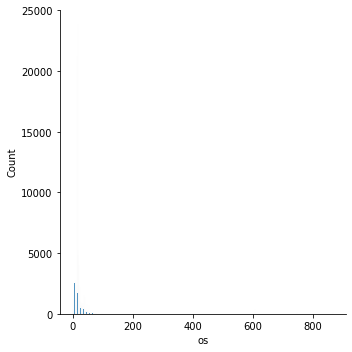

In [ ]:
print('os unique count:', len(dataset['os'].unique()))
print(dataset['os'].value_counts())
seaborn.displot(dataset['os'])

In [22]:
! pip install category_encoders


     |████████████████████████████████| 82 kB 342 kB/s 


In [ ]:
from category_encoders import TargetEncoder

ip_encoder = TargetEncoder(cols='ip')
app_encoder = TargetEncoder(cols='app')
channel_encoder = TargetEncoder(cols='channel')
device_encoder = TargetEncoder(cols='device')
os_encoder = TargetEncoder(cols='os')

dataset['ip_encoded'] = ip_encoder.fit_transform(dataset['ip'], dataset['is_attributed'])
dataset['app_encoded'] = app_encoder.fit_transform(dataset['app'], dataset['is_attributed'])
dataset['channel_encoded'] = channel_encoder.fit_transform(dataset['channel'], dataset['is_attributed'])
dataset['device_encoded'] = device_encoder.fit_transform(dataset['device'], dataset['is_attributed'])
dataset['os_encoded'] = os_encoder.fit_transform(dataset['os'], dataset['is_attributed'])

dataset.drop(['ip', 'app', 'channel', 'device', 'os'], axis=1, inplace=True)

dataset

,is_attributed,Afternoon,Midnight,Morning,Night,ip_encoded,app_encoded,channel_encoded,device_encoded,os_encoded
0,0,0,0,1,0,2.068086e-06,0.000076,0.0,0.001548,0.001178
1,0,1,0,0,0,0.000000e+00,0.000000,0.0,0.001548,0.001147
2,0,0,0,0,1,6.104970e-04,0.000076,0.0,0.001548,0.001718
3,0,0,1,0,0,2.705906e-04,0.000000,0.0,0.001548,0.001178
4,0,0,0,1,0,1.076567e-04,0.000076,0.0,0.001548,0.000844
...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,0,0,4.082870e-05,0.001038,0.0,0.001548,0.001718
99996,0,0,0,1,0,5.130936e-09,0.000890,0.0,0.001548,0.001178
99997,0,0,0,1,0,1.076567e-04,0.000219,0.0,0.001548,0.001178
99998,0,1,0,0,0,0.000000e+00,0.000233,0.0,0.001548,0.000907


# Process

In [13]:
! pip install category_encoders


In [14]:
def time_process(df):
  df['click_time'] = pd.to_datetime(df['click_time'])

  midnight = df[df['click_time'].dt.time < datetime.time(hour=6, minute=0, second=0)]
  morning = df[(df['click_time'].dt.time < datetime.time(hour=12, minute=0, second=0)) & (df['click_time'].dt.time >= datetime.time(hour=6, minute=0, second=0))]
  afternoon = df[(df['click_time'].dt.time < datetime.time(hour=18, minute=0, second=0)) & (df['click_time'].dt.time >= datetime.time(hour=12, minute=0, second=0))]
  night = df[(df['click_time'].dt.time <= datetime.time(hour=23, minute=59, second=59)) & (df['click_time'].dt.time >= datetime.time(hour=18, minute=0, second=0))]
  
  midnight['click_time'] = 'Midnight'
  morning['click_time'] = 'Morning'
  afternoon['click_time'] = 'Afternoon'
  night['click_time'] = 'Night'
  df = pd.concat([midnight, morning, afternoon, night])
  df = df.sample(frac=1).reset_index(drop=True)

  # Get one hot encoding of columns B
  one_hot = pd.get_dummies(df['click_time'])
  # Drop column B as it is now encoded
  df = df.drop('click_time',axis = 1)
  # Join the encoded df
  df = df.join(one_hot)
  
  if 'Night' not in df.columns:
    df['Night'] = 0
  if 'Morning' not in df.columns:
    df['Morning'] = 0
  if 'Afetrnoon' not in df.columns:
    df['Afternoon'] = 0
  if 'Midnight' not in df.columns:
    df['Midnight'] = 0

  return df


In [15]:
from category_encoders import TargetEncoder

def encode(df, ip_encoder, app_encoder, channel_encoder, device_encoder, os_encoder):
  df['ip_encoded'] = ip_encoder.fit_transform(df['ip'], df['is_attributed'])
  df['app_encoded'] = app_encoder.fit_transform(df['app'], df['is_attributed'])
  df['channel_encoded'] = channel_encoder.fit_transform(df['channel'], df['is_attributed'])
  df['device_encoded'] = device_encoder.fit_transform(df['device'], df['is_attributed'])
  df['os_encoded'] = os_encoder.fit_transform(df['os'], df['is_attributed'])

  df.drop(['ip', 'app', 'channel', 'device', 'os'], axis=1, inplace=True)

  return df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
import datetime

def preprocess(df, mode='train', ip_encoder=None, app_encoder=None, channel_encoder=None, device_encoder=None, os_encoder=None):

  df = df.copy()
  df = time_process(df)
  df = df.drop(['attributed_time'], axis=1)
  if mode == 'train':
    ip_encoder = TargetEncoder(cols='ip')
    app_encoder = TargetEncoder(cols='app')
    channel_encoder = TargetEncoder(cols='channel')
    device_encoder = TargetEncoder(cols='device')
    os_encoder = TargetEncoder(cols='os')

    df = encode(df, ip_encoder, app_encoder, channel_encoder, device_encoder, os_encoder)

    df = df.reindex(sorted(df.columns), axis=1)

    return df, ip_encoder, app_encoder, channel_encoder, device_encoder, os_encoder

  else:

    df['ip_encoded'] = ip_encoder.transform(df['ip'], df['is_attributed'])
    df['app_encoded'] = app_encoder.transform(df['app'], df['is_attributed'])
    df['channel_encoded'] = channel_encoder.transform(df['channel'], df['is_attributed'])
    df['device_encoded'] = device_encoder.transform(df['device'], df['is_attributed'])
    df['os_encoded'] = os_encoder.transform(df['os'], df['is_attributed'])
    df.drop(['ip', 'app', 'channel', 'device', 'os'], axis=1, inplace=True)

    df = df.reindex(sorted(df.columns), axis=1)

    return df

In [35]:
balance_train

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,108858,19,0,24,347,2017-11-07 13:55:23,2017-11-07 14:06:19,1
1,44725,34,1,19,243,2017-11-07 01:05:10,2017-11-07 02:17:46,1
2,228312,5,1,32,113,2017-11-08 13:41:27,2017-11-08 13:41:53,1
3,190548,2,1,22,477,2017-11-07 08:15:47,NaN,0
4,37025,2,1,19,219,2017-11-08 03:33:51,NaN,0
...,...,...,...,...,...,...,...,...
730948,120575,35,1,19,274,2017-11-08 05:09:10,2017-11-08 05:14:24,1
730949,176180,35,1,13,21,2017-11-07 01:27:28,2017-11-07 06:37:28,1
730950,37801,2,1,19,469,2017-11-07 09:46:49,NaN,0
730951,81834,18,1,14,107,2017-11-09 10:19:16,NaN,0


In [ ]:
balance_train, ip_encoder, app_encoder, channel_encoder, device_encoder, os_encoder = preprocess(balance_train, mode='train')
balance_test = preprocess(balance_test, mode='test', ip_encoder=ip_encoder, app_encoder=app_encoder, channel_encoder=channel_encoder, device_encoder=device_encoder, os_encoder=os_encoder)

In [37]:
balance_train

,Afternoon,Midnight,Morning,Night,app_encoded,channel_encoded,device_encoded,ip_encoded,is_attributed,os_encoded
0,0,1,0,0,0.971722,0.981103,0.976913,0.499943,1,0.963402
1,0,0,1,0,0.095283,0.105359,0.415481,0.370370,0,0.385846
2,0,0,0,0,0.985152,0.987763,0.976913,0.499943,1,0.963402
3,0,0,1,0,0.964000,0.987763,0.415481,0.499943,1,0.422082
4,0,0,0,0,0.094146,0.071899,0.415481,0.280000,0,0.254191
...,...,...,...,...,...,...,...,...,...,...
730948,0,1,0,0,0.409060,0.053636,0.415481,0.285714,0,0.422082
730949,0,1,0,0,0.985152,0.888573,0.976913,0.499943,1,0.983052
730950,0,0,0,1,0.041748,0.038502,0.415481,0.286244,1,0.622431
730951,0,1,0,0,0.080014,0.036517,0.415481,0.277778,0,0.591154


In [38]:
balance_test

,Afternoon,Midnight,Morning,Night,app_encoded,channel_encoded,device_encoded,ip_encoded,is_attributed,os_encoded
0,0,0,1,0,0.985152,0.987763,0.976913,0.499943,1,0.988996
1,0,1,0,0,0.095283,0.084369,0.415481,0.250000,0,0.302170
2,0,0,0,0,0.092419,0.116427,0.415481,0.500000,1,0.385846
3,0,0,0,0,0.168395,0.160343,0.415481,0.499943,1,0.422082
4,0,1,0,0,0.063277,0.062836,0.415481,0.315417,0,0.382870
...,...,...,...,...,...,...,...,...,...,...
182734,0,0,1,0,0.315250,0.294187,0.415481,0.187500,1,0.422082
182735,0,0,1,0,0.985152,0.987763,0.983051,0.283333,1,0.983052
182736,0,0,1,0,0.109092,0.099094,0.102200,0.396226,0,0.343268
182737,0,1,0,0,0.967875,0.981123,0.415481,0.865514,1,0.885840


In [ ]:
balance_train_2, ip_encoder, app_encoder, channel_encoder, device_encoder, os_encoder = preprocess(balance_train_2, mode='train')
unbalance_test = preprocess(unbalance_test, mode='test', ip_encoder=ip_encoder, app_encoder=app_encoder, channel_encoder=channel_encoder, device_encoder=device_encoder, os_encoder=os_encoder)

In [40]:
balance_train_2

,Afternoon,Midnight,Morning,Night,app_encoded,channel_encoded,device_encoded,ip_encoded,is_attributed,os_encoded
0,0,1,0,0,0.109269,0.098055,0.418916,0.333333,0,0.220420
1,0,1,0,0,0.998916,0.986787,0.418916,0.387755,1,0.328046
2,0,0,0,0,0.998916,0.986787,0.418916,0.250004,1,0.388862
3,0,1,0,0,0.987972,0.997960,0.418916,0.991007,1,0.294029
4,0,0,1,0,0.096202,0.121299,0.418916,0.500000,0,0.388862
...,...,...,...,...,...,...,...,...,...,...
826183,0,0,0,0,0.097520,0.169277,0.100695,0.340000,0,0.644839
826184,0,0,0,0,0.109269,0.042938,0.418916,0.280000,0,0.388862
826185,0,1,0,0,0.985495,0.987364,0.986979,0.598201,1,0.982278
826186,0,1,0,0,0.109269,0.098055,0.418916,0.334449,0,0.237462


In [41]:
unbalance_test

,Afternoon,Midnight,Morning,Night,app_encoded,channel_encoded,device_encoded,ip_encoded,is_attributed,os_encoded
0,0,0,0,0,0.043588,0.047194,0.418916,0.232044,0,0.418576
1,0,0,0,0,0.066866,0.066224,0.418916,0.202740,0,0.425201
2,0,0,0,0,0.210155,0.084998,0.418916,0.363636,0,0.388862
3,0,0,0,0,0.330306,0.457962,0.418916,0.317073,1,0.388862
4,0,0,0,0,0.169940,0.158030,0.418916,0.307693,0,0.390433
...,...,...,...,...,...,...,...,...,...,...
230052,0,0,0,0,0.035475,0.027372,0.418916,0.363643,0,0.349022
230053,0,0,0,0,0.109269,0.042938,0.418916,0.444463,0,0.337797
230054,0,0,0,0,0.237651,0.881724,0.418916,0.652174,0,0.883439
230055,0,0,0,0,0.962868,0.987364,0.418916,0.330097,1,0.328046


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

X = balance_train.drop('is_attributed', axis=1)
y = balance_train['is_attributed']
clf = LogisticRegression(random_state=0).fit(X, y)

In [43]:
X_test = balance_test.drop('is_attributed', axis=1)
y_test = balance_test['is_attributed']
clf.score(X_test, y_test)

0.9034086867061766

In [44]:
X = balance_train_2.drop('is_attributed', axis=1)
y = balance_train_2['is_attributed']
clf = LogisticRegression(random_state=0).fit(X, y)

In [45]:
X_test = unbalance_test.drop('is_attributed', axis=1)
y_test = unbalance_test['is_attributed']
clf.score(X_test, y_test)

0.9319733805100475

# SVM

In [ ]:
from sklearn.svm import SVC

X = balance_train.drop('is_attributed', axis=1)
y = balance_train['is_attributed']
clf = SVC(gamma='auto').fit(X, y)

In [ ]:
X_test = balance_test.drop('is_attributed', axis=1)
y_test = balance_test['is_attributed']
clf.score(X_test, y_test)

In [ ]:
X = balance_train_2.drop('is_attributed', axis=1)
y = balance_train_2['is_attributed']
clf = SVC(gamma='auto').fit(X, y)

In [ ]:
X_test = unbalance_test.drop('is_attributed', axis=1)
y_test = unbalance_test['is_attributed']
clf.score(X_test, y_test)

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

X = balance_train.drop('is_attributed', axis=1)
y = balance_train['is_attributed']
clf = KNeighborsClassifier(n_neighbors=6).fit(X, y)

In [21]:
X_test = balance_test.drop('is_attributed', axis=1)
y_test = balance_test['is_attributed']
clf.score(X_test, y_test)

0.9102709328605278

In [46]:
X = balance_train_2.drop('is_attributed', axis=1)
y = balance_train_2['is_attributed']
clf = KNeighborsClassifier(n_neighbors=6).fit(X, y)

In [47]:
X_test = unbalance_test.drop('is_attributed', axis=1)
y_test = unbalance_test['is_attributed']
clf.score(X_test, y_test)

0.9292392754839018

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

X = balance_train.drop('is_attributed', axis=1)
y = balance_train['is_attributed']
clf = DecisionTreeClassifier(random_state=0).fit(X, y)

In [49]:
X_test = balance_test.drop('is_attributed', axis=1)
y_test = balance_test['is_attributed']
clf.score(X_test, y_test)

0.8824388882504556

In [50]:
X = balance_train_2.drop('is_attributed', axis=1)
y = balance_train_2['is_attributed']
clf = DecisionTreeClassifier(random_state=0).fit(X, y)

In [51]:
X_test = unbalance_test.drop('is_attributed', axis=1)
y_test = unbalance_test['is_attributed']
clf.score(X_test, y_test)

0.8820944374654976

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

X = balance_train.drop('is_attributed', axis=1)
y = balance_train['is_attributed']

clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X, y)

In [53]:
X_test = balance_test.drop('is_attributed', axis=1)
y_test = balance_test['is_attributed']
clf.score(X_test, y_test)

0.9099097620102988

In [54]:
X = balance_train_2.drop('is_attributed', axis=1)
y = balance_train_2['is_attributed']

clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X, y)

In [55]:
X_test = unbalance_test.drop('is_attributed', axis=1)
y_test = unbalance_test['is_attributed']
clf.score(X_test, y_test)

0.952463954585168

# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

X = balance_train.drop('is_attributed', axis=1)
y = balance_train['is_attributed']

clf = GaussianNB().fit(X, y)

In [57]:
X_test = balance_test.drop('is_attributed', axis=1)
y_test = balance_test['is_attributed']
clf.score(X_test, y_test)

0.9003059007655727

In [58]:
X = balance_train_2.drop('is_attributed', axis=1)
y = balance_train_2['is_attributed']

clf = GaussianNB().fit(X, y)

In [59]:
X_test = unbalance_test.drop('is_attributed', axis=1)
y_test = unbalance_test['is_attributed']
clf.score(X_test, y_test)

0.9096310914251685